In [1]:
# Perform statistical analysis on topics

# Shapiro-Wilk test, ensure average value is representative of the sample 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

# Provide measure of dataset variability (95% confidence interval)

In [7]:
from scipy.stats import shapiro
from scipy.stats import bayes_mvs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
model_path = r'C:\Users\Eli Wolfson\Documents\University\Research\FakeNews\additional_code\70_PERCENT_CONFIDENCE_53K_INDIVIDUAL_HCP_AUTHORS_2020_NO_KEYWORDS_WITH_RETWEETS_20_TOPICS'
NUM_TOPICS = 20

Topic 0: Mean(statistic=0.11843161854767005, minmax=(0.11761741173715531, 0.11924582535818479))

Topic 1: Mean(statistic=0.27355524656368474, minmax=(0.27284897317797485, 0.2742615199493946))

Topic 2: Mean(statistic=0.09705403002121062, minmax=(0.09597171644532085, 0.09813634359710038))

Topic 3: Mean(statistic=0.04247108479993359, minmax=(0.040954408548284776, 0.043987761051582405))

Topic 6: Mean(statistic=0.5636979945116226, minmax=(0.5627912000894756, 0.5646047889337696))

Topic 8: Mean(statistic=0.10301415066797329, minmax=(0.10166706707548102, 0.10436123426046555))

Topic 9: Mean(statistic=0.11295540352189283, minmax=(0.10892935566102738, 0.11698145138275828))

Topic 10: Mean(statistic=0.48003424271793793, minmax=(0.4774333656106672, 0.4826351198252087))

Topic 16: Mean(statistic=0.5004917300608777, minmax=(0.49806285492992663, 0.5029206051918287))



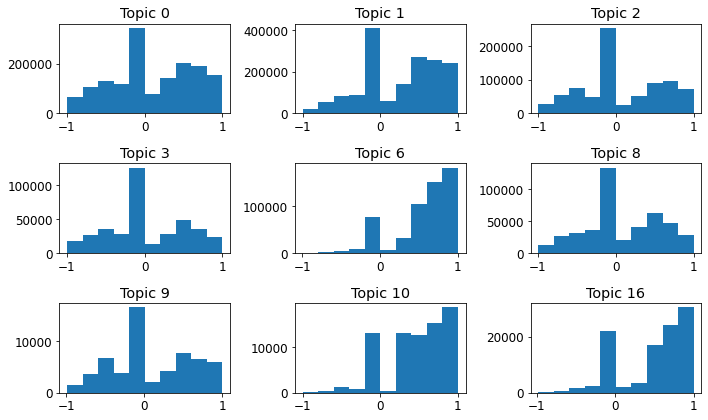

In [18]:
matplotlib.rcParams['font.size'] = 12

topics_to_show = [0, 1, 2, 3, 6, 8, 9, 10, 16]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))

for i, topic_id in enumerate(topics_to_show):
    sentiment_values = pd.read_csv('{}/topic_{}_sentiment_values.csv'.format(model_path, topic_id))['sentiment_value']
    
    pvalue = shapiro(sentiment_values)[1]
    if pvalue <= 0.05:
        bayes_ci = bayes_mvs(sentiment_values, alpha=0.95)
        #print('Topic {} is not normally distributed'.format(topic_id))
        print('Topic {}:'.format(topic_id), bayes_ci[0])
        #print(bayes_ci[1])
        #print(bayes_ci[2])
        print()
    else:
        print('Topic {} is normally distributed'.format(topic_id))
    
    
    
    
    ax[i // 3][i % 3].hist(sentiment_values)
    ax[i // 3][i % 3].set_title('Topic {}'.format(topic_id))
    
plt.tight_layout()
plt.savefig('sentiment_distributions_for_each_topic.png')